## Рассчет Z-оценки. Pandas

In [1]:
import pandas as pd
import numpy as np
import scipy.stats

In [2]:
eng = pd.read_csv('eng_test.csv', sep = ';')
eng.head()

,Id,Exam,Score,Advanced
0,ID1,TOEFL,77.0,NO
1,ID10,TOEFL,105.0,NO
2,ID100,TOEFL,107.0,YES
3,ID101,TOEFL,72.0,NO
4,ID102,TOEFL,120.0,YES


<Axes: >

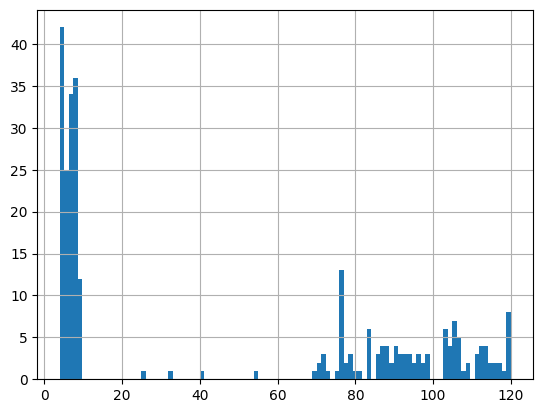

In [3]:
eng['Score'].hist(bins = 100)

<Axes: >

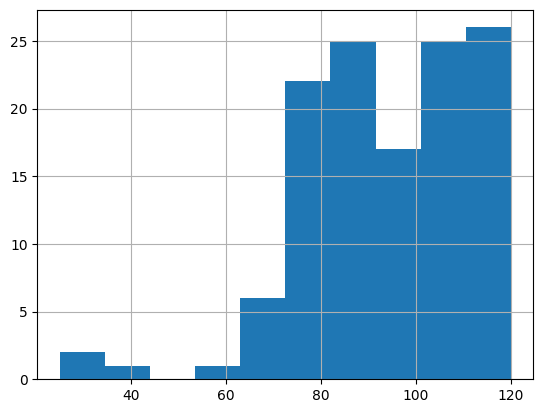

In [4]:
toefl = eng[eng['Exam'] == 'TOEFL']
toefl['Score'].hist()

<Axes: >

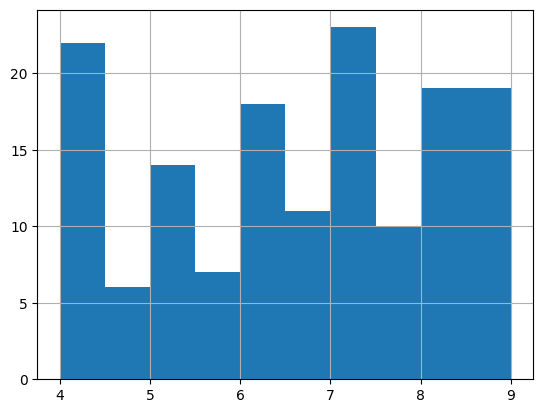

In [5]:
ielts = eng[eng['Exam'] == 'IELTS']
ielts['Score'].hist()

## Поиск Z-числа

In [6]:
X = toefl['Score'][0] # общее число данных
mean = toefl['Score'].mean() # среднее число
std = toefl['Score'].std(ddof=0) # среднеквадратичное число
print(X, mean, std)

77.0 93.776 17.832044863110905


In [7]:
z_score = (X - mean) / std
print(z_score)

-0.9407782522297515


## Поиск Z-числа. Обратный порядок.

In [8]:
z_new = 1.4706109
X_new = mean + z_new * std
print(round(X_new))

120


## Поиск Z-числа. С помощью функции.

In [56]:
toefl.loc[:,'z_score'] = scipy.stats.zscore(toefl['Score'])

In [57]:
toefl.head()

,Id,Exam,Score,Advanced,z_score
0,ID1,TOEFL,77.0,NO,-0.940778
1,ID10,TOEFL,105.0,NO,0.629429
2,ID100,TOEFL,107.0,YES,0.741586
3,ID101,TOEFL,72.0,NO,-1.221172
4,ID102,TOEFL,120.0,YES,1.470611


In [58]:
ielts.loc[:, 'z_score']= scipy.stats.zscore(ielts['Score'])

In [59]:
ielts.head()

,Id,Exam,Score,Advanced,z_core,z_score
30,ID126,IELTS,9.0,YES,1.639443,1.639443
31,ID127,IELTS,5.0,NO,-0.915088,-0.915088
32,ID128,IELTS,7.5,YES,0.681494,0.681494
33,ID129,IELTS,5.0,NO,-0.915088,-0.915088
35,ID130,IELTS,4.0,NO,-1.553720,-1.553720


## Обединение групп

In [60]:
eng_new = pd.concat([toefl, ielts])
eng_new

,Id,Exam,Score,Advanced,z_score,z_core
0,ID1,TOEFL,77.0,NO,-0.940778,NaN
1,ID10,TOEFL,105.0,NO,0.629429,NaN
2,ID100,TOEFL,107.0,YES,0.741586,NaN
3,ID101,TOEFL,72.0,NO,-1.221172,NaN
4,ID102,TOEFL,120.0,YES,1.470611,NaN
...,...,...,...,...,...,...
190,ID270,IELTS,8.0,YES,1.000810,1.000810
191,ID271,IELTS,6.5,NO,0.042861,0.042861
192,ID272,IELTS,4.0,NO,-1.553720,-1.553720
193,ID273,IELTS,7.0,YES,0.362178,0.362178


<Axes: >

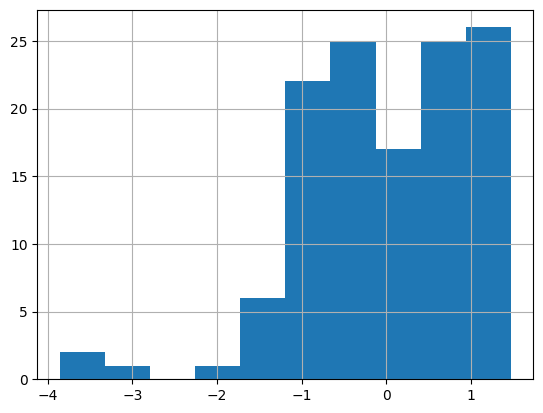

In [14]:
eng_new['z_score'].hist()

In [15]:
eng_new[eng_new['z_score'] < -3] # выборосы

,Id,Exam,Score,Advanced,z_score,z_core
25,ID121,TOEFL,32.0,NO,-3.464325,NaN
27,ID123,TOEFL,25.0,YES,-3.856877,NaN


In [16]:
eng_new.groupby('Advanced')['z_score'].mean()

Advanced
NO    -0.518538
YES    0.357371
Name: z_score, dtype: float64

## Выбросы

In [18]:
bikes = pd.read_pickle('BikesDataVars.pkl')
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,0,2.2,0.0,0.0,Winter,0,True,257,Freesing,0
1,2017-12-01,1,-5.5,0,0.8,0.0,0.0,Winter,0,True,219,Freesing,0
2,2017-12-01,2,-6.0,0,1.0,0.0,0.0,Winter,0,True,162,Freesing,0
3,2017-12-01,3,-6.2,1,0.9,0.0,0.0,Winter,0,True,148,Freesing,0
4,2017-12-01,4,-6.0,0,2.3,0.0,0.0,Winter,0,True,97,Freesing,0


In [19]:
bikes['Rental Count'].describe()

count    8760.000000
mean      696.582078
std       749.812613
min         0.000000
25%       157.000000
50%       425.500000
75%      1009.000000
max      6012.000000
Name: Rental Count, dtype: float64

In [20]:
q3 = np.percentile(bikes['Rental Count'], 75)
q1 = np.percentile(bikes['Rental Count'], 25)

In [21]:
q3, q1

(np.float64(1009.0), np.float64(157.0))

In [22]:
iqr = q3 - q1
iqr

np.float64(852.0)

In [23]:
iqr_threshold_bottom = q1 - 1.5 * iqr # нижняя граница выбросов
iqr_threshold_top = q3 + 1.5 * iqr # верхняя граница выбросов

print(iqr_threshold_bottom, iqr_threshold_top)

-1121.0 2287.0


In [24]:
bikes[bikes['Rental Count'] > iqr_threshold_top].shape # кол-во наблюдений, которые считаются выбросами

(413, 13)

In [25]:
bikes[bikes['Rental Count'] > iqr_threshold_top]['Hour'].value_counts()

Hour
18    95
19    64
17    51
20    48
21    39
8     38
16    23
22    21
15    10
14     8
13     7
23     4
7      4
9      1
Name: count, dtype: int64

In [26]:
bikes[bikes['Rental Count'] > iqr_threshold_top]['Seasons'].value_counts()

Seasons
Summer    196
Autumn    116
Spring    101
Name: count, dtype: int64

In [27]:
# Выбросы через стреднеквадратичное отклонение

In [28]:
# нужно : найти среднее, верхнюю и нижнюю границу (на 2 сркв откл больше и ниже)

In [29]:
mean = bikes['Rental Count'].mean()
std = bikes['Rental Count'].std()
std_threshold_bottom = mean - 2.5 * std
std_threshold_top = mean + 2.5 * std

print(std_threshold_bottom, std_threshold_top)

-1177.949455164326 2571.113610415468


In [30]:
bikes[bikes['Rental Count'] > std_threshold_top].shape

(278, 13)

In [31]:
# отфильтруем наши значения и посмотрим на мцд той выборки, где нет выбросов и где есть (оригинальная)

In [32]:
# фильтрация без выбросов

iqr_no_outliers = bikes[bikes['Rental Count'] <= iqr_threshold_top]
std_no_outliers = bikes[bikes['Rental Count'] <= std_threshold_top]

In [33]:
# среднее

print(bikes['Rental Count'].mean()) # оригинал
print(iqr_no_outliers['Rental Count'].mean()) 
print(std_no_outliers['Rental Count'].mean())

696.5820776255708
584.146280100635
613.2393303466164


In [34]:
# медиана

print(bikes['Rental Count'].median()) # оригинал
print(iqr_no_outliers['Rental Count'].median()) 
print(std_no_outliers['Rental Count'].median())

425.5
392.0
402.0


## Работа с пропущенными значениями

In [35]:
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,0,2.2,0.0,0.0,Winter,0,True,257,Freesing,0
1,2017-12-01,1,-5.5,0,0.8,0.0,0.0,Winter,0,True,219,Freesing,0
2,2017-12-01,2,-6.0,0,1.0,0.0,0.0,Winter,0,True,162,Freesing,0
3,2017-12-01,3,-6.2,1,0.9,0.0,0.0,Winter,0,True,148,Freesing,0
4,2017-12-01,4,-6.0,0,2.3,0.0,0.0,Winter,0,True,97,Freesing,0


In [36]:
def get_temp_cat(temp):
    if temp < 0:
        return 'Freezing'
    elif temp > 15:
        return 'Chilly'
    elif temp < 26:
        return 'Nice'
    elif temp >= 26:
        return 'Hot'
    else:
        return temp

In [37]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  8760 non-null   datetime64[ns]
 1   Hour                  8760 non-null   int64         
 2   Temperature           8581 non-null   float64       
 3   Humidity              8760 non-null   int64         
 4   Wind speed            8760 non-null   float64       
 5   Rainfall              8760 non-null   float64       
 6   Snowfall              8760 non-null   float64       
 7   Seasons               8760 non-null   object        
 8   Holiday               8760 non-null   int64         
 9   Functioning Day       8760 non-null   bool          
 10  Rental Count          8760 non-null   int64         
 11  Temperature Category  8581 non-null   category      
 12  Good Weather          8760 non-null   int64         
dtypes: bool(1), catego

In [38]:
bikes.isna().sum() # сумма пропущенных значений в каждой ячейке

Date                      0
Hour                      0
Temperature             179
Humidity                  0
Wind speed                0
Rainfall                  0
Snowfall                  0
Seasons                   0
Holiday                   0
Functioning Day           0
Rental Count              0
Temperature Category    179
Good Weather              0
dtype: int64

In [39]:
type(bikes[bikes['Temperature'].isna()]['Temperature'][39])

numpy.float64

In [40]:
# что можно делать с пропущенными значениями?
# 1 - если большинство значений пропущены или недоступны, то стоит эту колонку выбросить

In [41]:
# 2 - выбросить только те наблюдения, в которых есть пропущенные значения

bikes.dropna(subset = ['Temperature']).shape

# есть метод для dropna() - inplace = True. Он значит, что коллонка удалится в оригинальном датасете

(8581, 13)

## Заполнение пропущенных значений

In [42]:
# метод fillna() - заполняет пустую ячейку либо числом, либо искать нужное значение в векторе и подставлять его

bikes['Temperature_Median'] = bikes['Temperature'].fillna(bikes['Temperature'].median())
bikes[bikes['Temperature'].isna()].head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Temperature Category,Good Weather,Temperature_Median
39,2017-12-02,15,NaN,1,2.3,0.0,0.0,Winter,0,True,688,NaN,0,13.7
50,2017-12-03,2,NaN,0,1.4,0.0,0.0,Winter,0,True,262,NaN,0,13.7
64,2017-12-03,16,NaN,0,1.6,0.0,0.0,Winter,0,True,577,NaN,0,13.7
105,2017-12-05,9,NaN,0,1.3,0.0,0.0,Winter,0,True,313,NaN,0,13.7
151,2017-12-07,7,NaN,0,0.5,0.0,0.9,Winter,0,True,269,NaN,0,13.7


In [43]:
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Temperature Category,Good Weather,Temperature_Median
0,2017-12-01,0,-5.2,0,2.2,0.0,0.0,Winter,0,True,257,Freesing,0,-5.2
1,2017-12-01,1,-5.5,0,0.8,0.0,0.0,Winter,0,True,219,Freesing,0,-5.5
2,2017-12-01,2,-6.0,0,1.0,0.0,0.0,Winter,0,True,162,Freesing,0,-6.0
3,2017-12-01,3,-6.2,1,0.9,0.0,0.0,Winter,0,True,148,Freesing,0,-6.2
4,2017-12-01,4,-6.0,0,2.3,0.0,0.0,Winter,0,True,97,Freesing,0,-6.0


In [44]:
bikes.iloc[38:42]

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Temperature Category,Good Weather,Temperature_Median
38,2017-12-02,14,7.3,0,1.3,0.0,0.0,Winter,0,True,1054,Chilly,0,7.3
39,2017-12-02,15,NaN,1,2.3,0.0,0.0,Winter,0,True,688,NaN,0,13.7
40,2017-12-02,16,6.4,1,2.6,0.0,0.0,Winter,0,True,592,Chilly,0,6.4
41,2017-12-02,17,6.0,1,2.5,0.0,0.0,Winter,0,True,141,Chilly,0,6.0


In [45]:
# Заполнение случайными данными

In [46]:
tamps_random = np.random.choice(bikes['Temperature'].dropna(), 8760)

In [47]:
tamps_random[:100]

array([  9.8,  -2. ,  14.1,  26.3,  27. ,  -3.8,   6. ,   1.6,   9.7,
        14.3,  14.7,  19.7,  14.2,  32.3,  16.2,  24.4,  -1.8,  27.5,
        16.9,  21.9,  17.5,  23.5,  20. ,  25. ,  13.3,  27.7,  18.8,
        -0.4,  37.4,  24.8,   2.1,  13. ,  27.4,  19.1,   2. ,  16.9,
        -1.3,  23.3,  21. ,  -3.3,  24.9,   1.2,   0.9,  21.2,  18.5,
        30.7,  20.5,  24.7,  -8.5,   7.6,  24.2,  11.3,  18.7,  11.4,
        15. ,  26.3,  21.6,  22.6,  29.5,  21.8,  -6.9,  33.6,   3.1,
        29.4,  15.1,  35.6,  19.4,  22.1,  25.2,  -2.6, -12.1,   4.2,
        31.2,  25.2,  19.4,  13.2,   3.9, -13.1,  23.3,  22.8,  15.3,
        -8.6,  11.3,   7.7,   0.8,  18.2,  -3.2,  29.6,  32.5,   7. ,
        24.7,  22.2,  27.3,  21.6,  28.5,  20.9,  33. ,   5.1,  29.8,
        28.1])

In [48]:
bikes['Temperature_Random'] = bikes['Temperature'].fillna(pd.Series(tamps_random))

In [49]:
bikes[bikes['Temperature'].isna()].head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Temperature Category,Good Weather,Temperature_Median,Temperature_Random
39,2017-12-02,15,NaN,1,2.3,0.0,0.0,Winter,0,True,688,NaN,0,13.7,-3.3
50,2017-12-03,2,NaN,0,1.4,0.0,0.0,Winter,0,True,262,NaN,0,13.7,24.2
64,2017-12-03,16,NaN,0,1.6,0.0,0.0,Winter,0,True,577,NaN,0,13.7,15.1
105,2017-12-05,9,NaN,0,1.3,0.0,0.0,Winter,0,True,313,NaN,0,13.7,-0.5
151,2017-12-07,7,NaN,0,0.5,0.0,0.9,Winter,0,True,269,NaN,0,13.7,-10.6


In [50]:
bikes.iloc[38:42]

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Temperature Category,Good Weather,Temperature_Median,Temperature_Random
38,2017-12-02,14,7.3,0,1.3,0.0,0.0,Winter,0,True,1054,Chilly,0,7.3,7.3
39,2017-12-02,15,NaN,1,2.3,0.0,0.0,Winter,0,True,688,NaN,0,13.7,-3.3
40,2017-12-02,16,6.4,1,2.6,0.0,0.0,Winter,0,True,592,Chilly,0,6.4,6.4
41,2017-12-02,17,6.0,1,2.5,0.0,0.0,Winter,0,True,141,Chilly,0,6.0,6.0


In [51]:
# заполнение по медиане и некоторым категориям

In [52]:
# bikes.groupby(bikes['Date'].dt.isocalendar().week, 'Hour'])['Temperature'].transform('median')